In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('~/data/Kaggle/BeijingPM20100101_20151231.csv', index_col='No')
df.head()

,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
No,,,,,,,,,,,,,,,,,
1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,52584.0,2012.499772,1.707485,2010.00,2011.00,2012.00,2014.00,2015.0
month,52584.0,6.523962,3.448452,1.00,4.00,7.00,10.00,12.0
day,52584.0,15.726609,8.798896,1.00,8.00,16.00,23.00,31.0
hour,52584.0,11.500000,6.922252,0.00,5.75,11.50,17.25,23.0
season,52584.0,2.491100,1.116988,1.00,1.00,2.00,3.00,4.0
PM_Dongsi,25052.0,89.154439,87.239267,3.00,24.00,64.00,124.00,737.0
PM_Dongsihuan,20508.0,92.560806,88.027434,3.00,28.00,68.00,127.00,672.0
PM_Nongzhanguan,24931.0,88.643737,88.041166,3.00,24.00,62.00,122.00,844.0
PM_US Post,50387.0,95.904241,91.643772,1.00,27.00,69.00,132.00,994.0
DEWP,52579.0,2.074554,14.222059,-40.00,-10.00,2.00,15.00,28.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52584 entries, 1 to 52584
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             52584 non-null  int64  
 1   month            52584 non-null  int64  
 2   day              52584 non-null  int64  
 3   hour             52584 non-null  int64  
 4   season           52584 non-null  int64  
 5   PM_Dongsi        25052 non-null  float64
 6   PM_Dongsihuan    20508 non-null  float64
 7   PM_Nongzhanguan  24931 non-null  float64
 8   PM_US Post       50387 non-null  float64
 9   DEWP             52579 non-null  float64
 10  HUMI             52245 non-null  float64
 11  PRES             52245 non-null  float64
 12  TEMP             52579 non-null  float64
 13  cbwd             52579 non-null  object 
 14  Iws              52579 non-null  float64
 15  precipitation    52100 non-null  float64
 16  Iprec            52100 non-null  float64
dtypes: float64(11), i

In [6]:
df.columns

Index(['year', 'month', 'day', 'hour', 'season', 'PM_Dongsi', 'PM_Dongsihuan',
       'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd',
       'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [7]:
df.isna().sum() / df.year.count() * 100

year                0.000000
month               0.000000
day                 0.000000
hour                0.000000
season              0.000000
PM_Dongsi          52.358132
PM_Dongsihuan      60.999544
PM_Nongzhanguan    52.588240
PM_US Post          4.178077
DEWP                0.009509
HUMI                0.644683
PRES                0.644683
TEMP                0.009509
cbwd                0.009509
Iws                 0.009509
precipitation       0.920432
Iprec               0.920432
dtype: float64

In [8]:
df[df.year == 2010].PM_Dongsi.sum()

np.float64(0.0)

In [9]:
df.fillna({'PM_US Post': df['PM_US Post'].mean(), 
           'precipitation': df['precipitation'].median(), 
           'Iprec': df['Iprec'].median(), 
           'DEWP': df['DEWP'].mean(), 
           'HUMI': df['HUMI'].mean(), 
           'PRES': df['PRES'].mean(), 
           'TEMP': df['TEMP'].mean()}, inplace=True)

In [10]:
df.fillna({'cbwd': 'cv', 'Iws': df.Iws.mode()}, inplace=True)

In [11]:
df.fillna({'Iws': float(df['Iws'].mode())}, inplace=True)

In [12]:
df.isna().sum() / df.year.count() * 100

year                0.000000
month               0.000000
day                 0.000000
hour                0.000000
season              0.000000
PM_Dongsi          52.358132
PM_Dongsihuan      60.999544
PM_Nongzhanguan    52.588240
PM_US Post          0.000000
DEWP                0.000000
HUMI                0.000000
PRES                0.000000
TEMP                0.000000
cbwd                0.000000
Iws                 0.000000
precipitation       0.000000
Iprec               0.000000
dtype: float64

In [25]:
miss = df[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']]
imputer = IterativeImputer(random_state=42)
df[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']] = imputer.fit_transform(miss)

TypeError: only length-1 arrays can be converted to Python scalars

In [24]:
df.to_csv('~/data/Kaggle/BeijingPM.csv')

<Axes: xlabel='PM_Dongsi'>

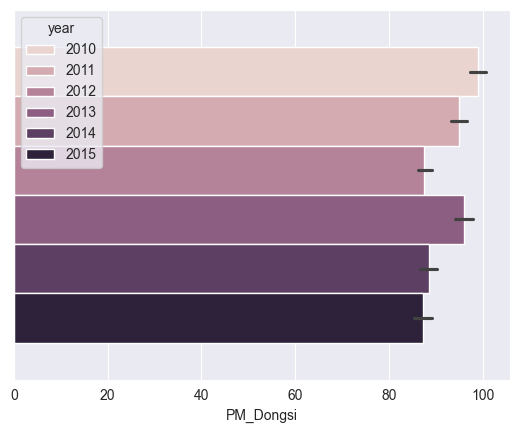

In [22]:
sns.barplot(hue='year', x='PM_Dongsi' , data=df)

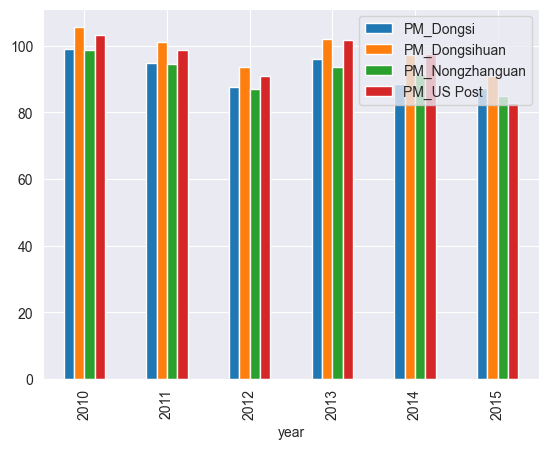

In [23]:
df.groupby('year')[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean().plot(kind='bar')
# plt.legend()
plt.show()

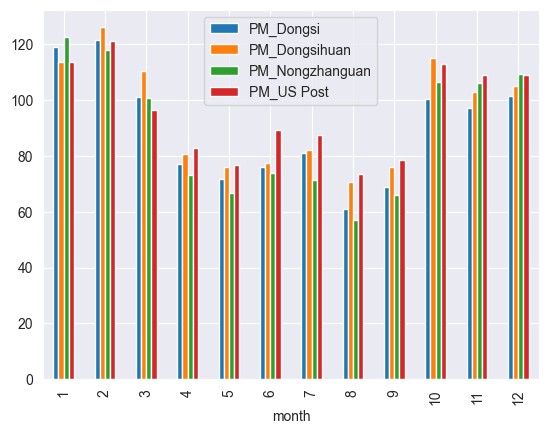

In [25]:
df.groupby('month')[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean().plot(kind='bar')
# plt.legend()
plt.show()

<Axes: xlabel='month'>

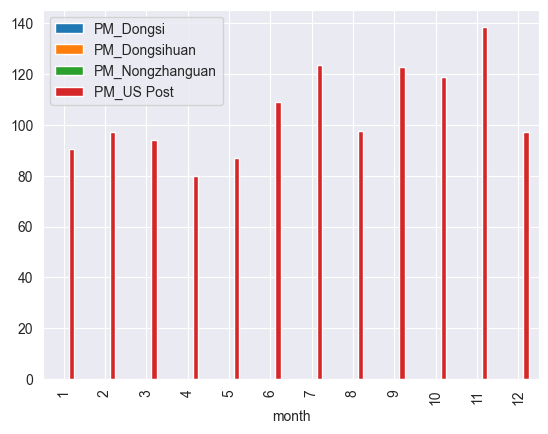

In [35]:
df[df.year == 2010].groupby('month')[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean().plot(kind='bar')

<Axes: xlabel='PM_US Post', ylabel='Count'>

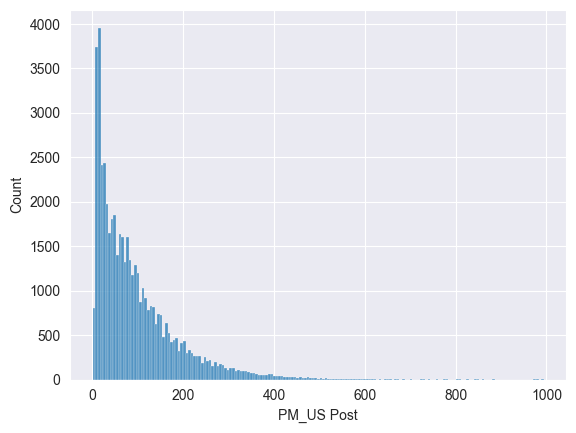

In [10]:
sns.histplot(df['PM_US Post'])

In [35]:
df.fillna({'PM_US Post': df['PM_US Post'].mean()}, inplace=True)

<Axes: xlabel='Iprec', ylabel='Count'>

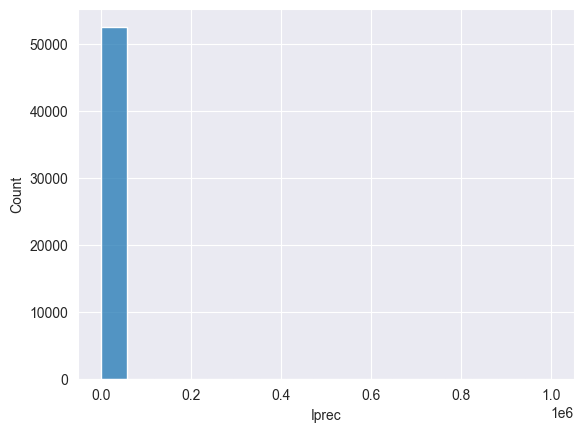

In [13]:
sns.histplot(df.Iprec)

In [17]:
df.Iprec.median()

np.float64(0.0)

<Axes: xlabel='precipitation', ylabel='Count'>

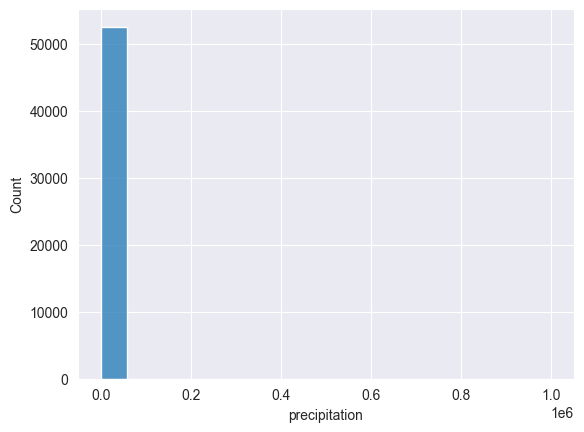

In [14]:
sns.histplot(df.precipitation)

In [45]:
df.cbwd.value_counts()

cbwd
SE    18272
NW    16717
cv    11417
NE     6178
Name: count, dtype: int64

In [41]:
df.Iws.value_counts()

Iws
0.89      7631
1.79      5864
3.13      2337
1.78      2235
4.92      1515
          ... 
105.08       1
100.16       1
113.98       1
67.92        1
465.34       1
Name: count, Length: 2975, dtype: int64

In [42]:
df.fillna({'cbwd': 'None'}, inplace=True)

In [44]:
df.replace({'cbwd': 'None'}, 'cv', inplace=True)

In [78]:
df.Iws[df.Iws.isna()]

No
45923   NaN
47955   NaN
49272   NaN
51329   NaN
51892   NaN
Name: Iws, dtype: float64

In [81]:
df.cbwd[df.cbwd.isna()]

No
45923    NaN
47955    NaN
49272    NaN
51329    NaN
51892    NaN
Name: cbwd, dtype: object

In [87]:
df.Iws[df.cbwd[df.cbwd == 'cv'].index].mode()

0    0.89
Name: Iws, dtype: float64

In [2]:
df = pd.read_csv('~/data/Kaggle/BeijingPM.csv', index_col='No')

In [22]:
precip = df.groupby(['year', 'month'])['precipitation'].sum()

In [24]:
precip = pd.DataFrame(precip)
precip = precip.reset_index(['year', 'month'])

<Axes: xlabel='month', ylabel='precipitation'>

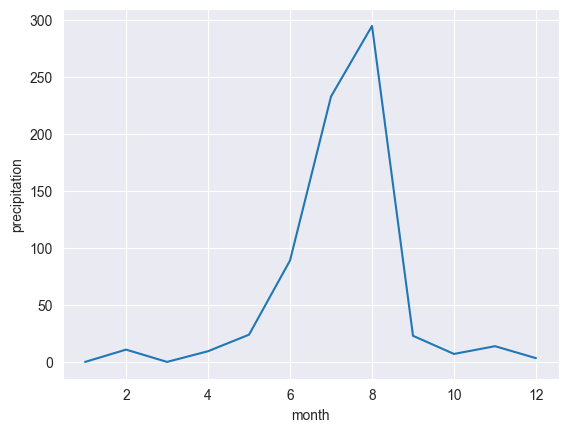

In [42]:
sns.lineplot(x='month', y=precip[precip.year==2011].precipitation, data=precip)

In [39]:
precip[precip.year==2010]

,year,month,precipitation
0,2010,1,11.2
1,2010,2,5.2
2,2010,3,23.2
3,2010,4,19.9
4,2010,5,50.3
5,2010,6,35.6
6,2010,7,70.9
7,2010,8,110.3
8,2010,9,69.3
9,2010,10,57.2


In [6]:
df.season.replace({1:'spring', 2: 'summer', 3: 'autumn', 4: 'winter'}, inplace=True)


In [7]:
df.season.unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [5]:
year = df[df['year'] == 2010]
year

,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
No,,,,,,,,,,,,,,,,,
1,2010,1,1,0,4,92.191482,98.481998,91.714526,95.904241,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
2,2010,1,1,1,4,92.191482,98.481998,91.714526,95.904241,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
3,2010,1,1,2,4,92.191482,98.481998,91.714526,95.904241,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
4,2010,1,1,3,4,92.191482,98.481998,91.714526,95.904241,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
5,2010,1,1,4,4,92.191482,98.481998,91.714526,95.904241,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2010,12,31,19,4,20.032833,22.094680,17.980773,17.000000,-20.0,29.0,1030.0,-5.0,NW,534.65,0.0,0.0
8757,2010,12,31,20,4,21.861851,24.030883,19.849716,19.000000,-20.0,32.0,1031.0,-6.0,NW,543.59,0.0,0.0
8758,2010,12,31,21,4,19.118324,21.126578,17.046302,16.000000,-21.0,29.0,1031.0,-6.0,NW,552.53,0.0,0.0


In [8]:
year.groupby('month')['PM_Dongsi'].mean()

month
1      87.769666
2      93.411173
3      90.572522
4      77.753358
5      84.190233
6     101.617408
7     117.360450
8      93.669856
9     108.174834
10    113.059318
11    128.018119
12     93.297926
Name: PM_Dongsi, dtype: float64

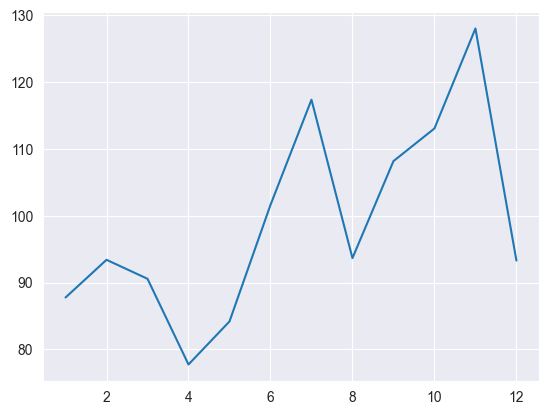

In [13]:
plt.plot(year.groupby('month')['PM_Dongsi'].mean())

In [4]:
month = df[df['year'] == 2010]
month

,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
No,,,,,,,,,,,,,,,,,
1,2010,1,1,0,4,92.191482,98.481998,91.714526,95.904241,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
2,2010,1,1,1,4,92.191482,98.481998,91.714526,95.904241,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
3,2010,1,1,2,4,92.191482,98.481998,91.714526,95.904241,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
4,2010,1,1,3,4,92.191482,98.481998,91.714526,95.904241,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
5,2010,1,1,4,4,92.191482,98.481998,91.714526,95.904241,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2010,12,31,19,4,20.032833,22.094680,17.980773,17.000000,-20.0,29.0,1030.0,-5.0,NW,534.65,0.0,0.0
8757,2010,12,31,20,4,21.861851,24.030883,19.849716,19.000000,-20.0,32.0,1031.0,-6.0,NW,543.59,0.0,0.0
8758,2010,12,31,21,4,19.118324,21.126578,17.046302,16.000000,-21.0,29.0,1031.0,-6.0,NW,552.53,0.0,0.0


In [5]:
season = month[month['season'] == 4]

In [11]:
season_data = season.groupby('month')[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean()

In [17]:
pd.value_counts(season.month).index

Index([1, 12, 2], dtype='int64', name='month')

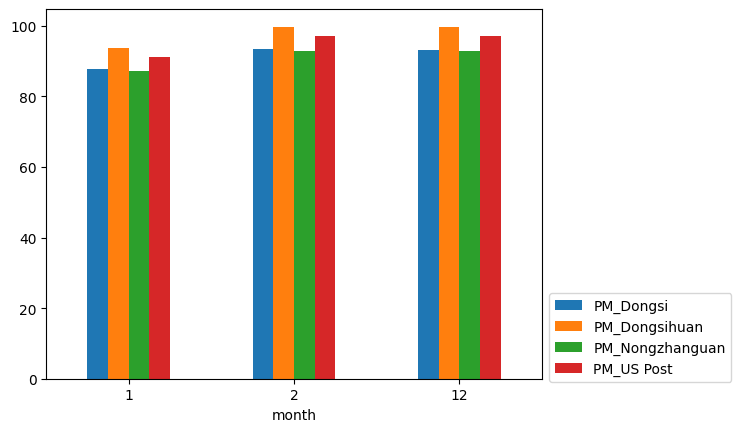

In [38]:
season.groupby('month')[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean().plot.bar()
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1, .25))

In [89]:
season_data = season.groupby('month')[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean()
season_data

,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post
month,,,,
1,87.769666,93.801053,87.196189,91.069061
2,93.411173,99.773166,92.960841,97.237953
12,93.297926,99.653282,92.845122,97.114119


In [95]:
x = np.arange(len(season_data.index))

array([0, 1, 2])

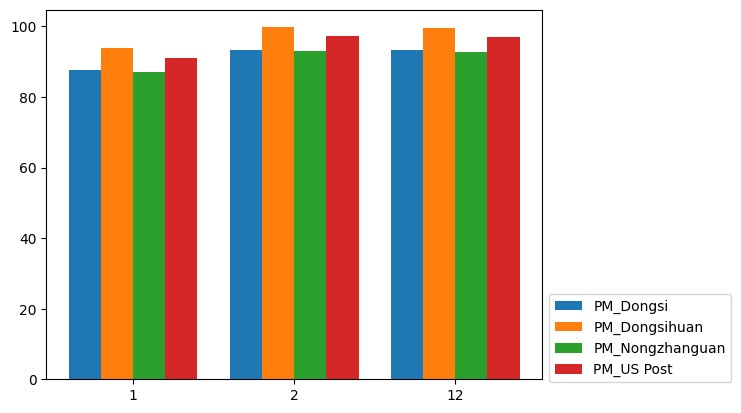

In [152]:
x = np.arange(len(season_data.index))  # setting each bar distance
width = 0.2  # bar width
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
for col in season_data.columns:
    offset = width * multiplier  # x offset 
    plt.bar(x + offset, season_data[col], width)
    # ax.bar_label(rects)
    multiplier += 1

plt.xticks(ticks=[0.3, 1.3, 2.3], labels=[1, 2, 12])
plt.legend(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post'], bbox_to_anchor=(1, .25))
plt.show()

In [80]:
season_data

,month,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post
0,1,87.769666,93.801053,87.196189,91.069061
1,2,93.411173,99.773166,92.960841,97.237953
2,12,93.297926,99.653282,92.845122,97.114119


In [14]:
year = df[df['year'] == 2010]
year_data = year.groupby('month')[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean()
year_data = year_data.reset_index()
year_data

,month,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post
0,1,87.769666,93.801053,87.196189,91.069061
1,2,93.411173,99.773166,92.960841,97.237953
2,3,90.572522,96.768163,90.060227,94.133936
3,4,77.753358,83.197765,76.961241,80.116401
4,5,84.190233,90.011856,83.538623,87.155013
5,6,101.617408,108.460306,101.346205,106.211330
6,7,117.360450,125.125928,117.432891,123.426075
7,8,93.669856,100.047008,93.225170,97.520818
8,9,108.174834,115.402013,108.046769,113.381762
9,10,113.059318,120.572739,113.037872,118.722861


In [18]:
year.groupby('month')[['Iws']].mean()

,Iws
month,
1,41.227325
2,13.466786
3,23.281237
4,58.280833
5,21.419126
6,10.175611
7,14.495914
8,16.308387
9,13.797931


In [3]:
year_data = df[df['year'] == 2010]
max_PM = year_data[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].agg('max')

In [4]:
max_PM.iloc[0]

np.float64(900.7051253267309)

In [8]:
month_data = year_data[year_data['month'] == 1]
month_data.groupby(['day'])[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean()

,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post
day,,,,
1,93.452581,99.817000,93.003153,97.283231
2,136.480329,145.366277,136.970125,144.333333
3,76.160831,81.511912,75.333952,78.375000
4,31.273674,33.994261,29.466983,29.291667
5,44.305429,47.789708,42.783200,43.541667
6,58.785157,63.117983,57.578997,59.375000
7,70.749985,75.783978,69.804997,72.458333
8,163.915603,174.409323,165.004266,174.333333
9,81.990826,87.683560,81.291207,84.750000


In [11]:
day_data = year_data.groupby(['month', 'day'])[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean()
day_data = day_data.reset_index()

In [19]:
day_data['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

In [20]:
day_data

,month,day,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post
0,Jan,1,93.452581,99.817000,93.003153,97.283231
1,Jan,2,136.480329,145.366277,136.970125,144.333333
2,Jan,3,76.160831,81.511912,75.333952,78.375000
3,Jan,4,31.273674,33.994261,29.466983,29.291667
4,Jan,5,44.305429,47.789708,42.783200,43.541667
...,...,...,...,...,...,...
360,Dec,27,74.903381,80.180773,74.049054,77.000000
361,Dec,28,32.416811,35.204388,30.635073,30.541667
362,Dec,29,35.846220,38.834769,34.139340,34.291667
363,Dec,30,20.680610,22.780419,18.642690,17.708333


In [23]:
season_data = year_data.groupby(['month', 'season'])[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']].mean()
season_data = season_data.reset_index()

In [25]:
season_data['month'].index

RangeIndex(start=0, stop=12, step=1)